In [26]:
import wave
import json
import librosa
import csv
import numpy as np
from pywt import wavedec
import pandas as pd
import tensorflow as tf
import os
import matplotlib.pyplot as plt

In [27]:
model_uri = '../modelh5/model_cnn_tuning.h5'
new_model = tf.keras.models.load_model(model_uri)
new_model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 99, 64)            256       
                                                                 
 max_pooling1d_4 (MaxPoolin  (None, 50, 64)            0         
 g1D)                                                            
                                                                 
 conv1d_5 (Conv1D)           (None, 48, 32)            6176      
                                                                 
 max_pooling1d_5 (MaxPoolin  (None, 24, 32)            0         
 g1D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 768)               0         
                                                                 
 dense_4 (Dense)             (None, 64)               

In [28]:
import wave
import json
header = 'filename'
for i in range(1, 41):
    header += f' mfcc{i}'
header += ' rms'
for i in range(1, 61):
  header += f' cqt{i}'
header += ' label'
header = header.split()
file = open('testing.csv', 'w', newline='')
with file:
    writer = csv.writer(file)
    writer.writerow(header)



In [29]:
dataset_path = '../data/testing_10/'

In [30]:
for i, (dirpath, dirnames, filenames) in enumerate(os.walk(dataset_path)):
        # ensure we're processing a genre sub-folder level
        if dirpath is not dataset_path:
            semantic_label = dirpath.split("/")[-1]
            print("\nProcessing: {}".format(semantic_label))
            for f in filenames:
                file_path = os.path.join(dirpath, f)
                to_append = f'{file_path}'
                # print(file_path)
                y, sr = librosa.load(file_path, mono=True, duration=3, sr=8000)
                coeffs = wavedec(y, 'db6', level=10)
                cA,cD10,cD9,cD8,cD7,cD6,cD5,cD4,cD3,cD2, cD1 = coeffs
                mfcc = librosa.feature.mfcc(y=cD7, sr=8000, n_mfcc=40, n_fft=2048, hop_length=512, n_mels=128)
                rms = librosa.feature.rms(y=cD7)[0]
                cqt = np.abs(librosa.cqt(y=cD7, sr=sr, n_bins=60)) 
                combined_features = np.concatenate((mfcc, rms.reshape(1, -1), cqt), axis=0)
                to_append = f'{file_path}'
                for e in combined_features:
                    to_append += f' {np.mean(e.T, axis=0)}'
                to_append += f' {semantic_label}'
                file = open('testing.csv', 'a', newline='')
                with file:
                    writer = csv.writer(file)
                    writer.writerow(to_append.split())





Processing: MVP


/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=148
  warnings.warn(
/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=512 is too large for input signal of length=148
  warnings.warn(
/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=512 is too large for input signal of length=74
  warnings.warn(
/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=512 is too large for input signal of length=37
  warnings.warn(
/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=512 is too large for input signal of length=19
  warnings.warn(
/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=512 is too large for input si


Processing: MS


/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=512 is too large for input signal of length=137
  warnings.warn(
/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=512 is too large for input signal of length=69
  warnings.warn(
/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=191
  warnings.warn(
/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=512 is too large for input signal of length=191
  warnings.warn(
/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=141
  warnings.warn(
/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=512 is too large for input


Processing: N


/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=171
  warnings.warn(
/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=512 is too large for input signal of length=171
  warnings.warn(
/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=174
  warnings.warn(
/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=512 is too large for input signal of length=174
  warnings.warn(
/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=512 is too large for input signal of length=87
  warnings.warn(
/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=512 is too large for input


Processing: MR


/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=154
  warnings.warn(
/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=512 is too large for input signal of length=154
  warnings.warn(
/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=512 is too large for input signal of length=77
  warnings.warn(
/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=512 is too large for input signal of length=39
  warnings.warn(
/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=132
  warnings.warn(
/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=512 is too large for input 


Processing: AS


/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=193
  warnings.warn(
/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=512 is too large for input signal of length=193
  warnings.warn(


In [31]:
data = pd.read_csv('./testing.csv')
data.head()

,filename,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,...,cqt52,cqt53,cqt54,cqt55,cqt56,cqt57,cqt58,cqt59,cqt60,label
0,../data/testing_10/MVP/New_MVP_135.wav,-138.238647,10.025784,-4.059746,-6.549687,-7.531800,-6.298636,2.611335,-6.633956,-17.698891,...,0.084539,0.069883,0.050488,0.028121,0.031201,0.052040,0.055858,0.042288,0.017009,MVP
1,../data/testing_10/MVP/New_MVP_192.wav,43.658340,45.276875,-29.792828,8.499954,10.269690,-8.077333,0.519189,5.604876,1.941025,...,0.413275,0.575333,0.786101,0.776569,0.531814,0.212022,0.213692,0.273594,0.171914,MVP
2,../data/testing_10/MVP/New_MVP_179.wav,-92.396683,24.867786,-15.592895,-2.651483,-2.984601,-0.610457,-9.440229,0.169227,-5.907492,...,0.062092,0.041932,0.047217,0.124291,0.160259,0.128930,0.096708,0.102768,0.072398,MVP
3,../data/testing_10/MVP/New_MVP_165.wav,-150.310135,9.593582,-1.734591,-1.790940,3.912673,1.750805,-7.954164,8.650328,6.579053,...,0.035313,0.041672,0.052694,0.063204,0.058457,0.037062,0.035638,0.040323,0.027854,MVP
4,../data/testing_10/MVP/New_MVP_024.wav,45.266201,20.393713,-21.386631,11.610426,-13.092157,4.374829,1.179462,1.983504,4.154501,...,0.056898,0.291817,0.467876,0.490158,0.631085,0.772307,0.668472,0.460948,0.282059,MVP


In [32]:
X = data.drop(['label', 'filename'], axis=1)
y = data.iloc[:, -1]

In [33]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
model = tf.keras.models.load_model(model_uri)
pred = model.predict(X)
hasil = []
class_labels = ['AS', 'MR', 'MS', 'MVP', 'N']
# class_labels = ['MVP', 'MS', 'N', 'MR', 'AS']
for i in pred:
    # hasil.append(np.argmax(i))
    print('===')
    print(i)
    cek = np.argmax(i)
    print(f'Actual class: {cek}')
    print(f'Predicted class: {class_labels[cek]}')
    print('===')
    hasil.append(class_labels[cek])
y_p = np.argmax(pred, axis=1)


4/4 [==============================] - 0s 2ms/step
===
[5.2006519e-05 9.3749501e-03 1.0049460e-03 9.8853433e-01 1.0338668e-03]
Actual class: 3
Predicted class: MVP
===
===
[0.00074972 0.38794598 0.32178956 0.2790007  0.010514  ]
Actual class: 1
Predicted class: MR
===
===
[0.00105741 0.7389426  0.02321226 0.23458266 0.00220503]
Actual class: 1
Predicted class: MR
===
===
[2.5098087e-05 3.5672665e-02 2.0336306e-02 9.4393212e-01 3.3780900e-05]
Actual class: 3
Predicted class: MVP
===
===
[9.5328729e-04 1.1217895e-04 9.3239250e-06 9.9726176e-01 1.6634293e-03]
Actual class: 3
Predicted class: MVP
===
===
[1.7796262e-04 1.3354717e-01 3.2094809e-05 8.6622041e-01 2.2395214e-05]
Actual class: 3
Predicted class: MVP
===
===
[3.6789730e-04 3.1457181e-04 3.7224957e-04 9.9893290e-01 1.2415977e-05]
Actual class: 3
Predicted class: MVP
===
===
[9.3425706e-07 7.8002398e-04 1.0774498e-05 9.9920422e-01 3.9980973e-06]
Actual class: 3
Predicted class: MVP
===
===
[3.4778626e-05 7.2470495e-05 5.4042239e-0

In [34]:
cm = confusion_matrix(y, hasil)
cm

array([[18,  2,  0,  0,  0],
       [ 0, 16,  1,  3,  0],
       [ 1,  2, 14,  3,  0],
       [ 0,  3,  0, 17,  0],
       [ 0,  2,  0,  0, 18]])

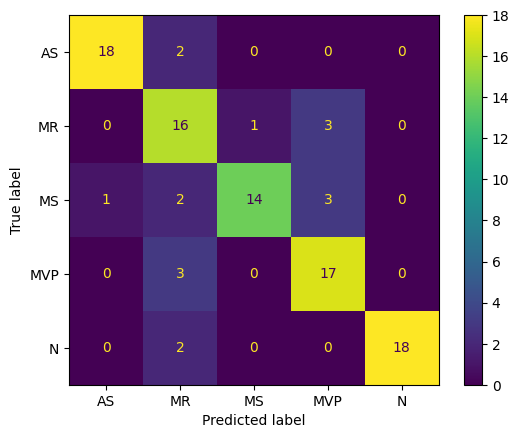

In [35]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['AS', 'MR', 'MS', 'MVP', 'N'])
disp.plot()
plt.show()

In [36]:
FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

In [37]:
print("TNR :" , TNR)
print("TPR :" , TPR)
print("FPR :" , FPR)
print("FNR :" , FNR)
print("ACC :" , ACC)
print("PPV :" , PPV)
print("NPV :" , NPV)
print("FDR :" , FDR)


TNR : [0.9875 0.8875 0.9875 0.925  1.    ]
TPR : [0.9  0.8  0.7  0.85 0.9 ]
FPR : [0.0125 0.1125 0.0125 0.075  0.    ]
FNR : [0.1  0.2  0.3  0.15 0.1 ]
ACC : [0.97 0.87 0.93 0.91 0.98]
PPV : [0.94736842 0.64       0.93333333 0.73913043 1.        ]
NPV : [0.97530864 0.94666667 0.92941176 0.96103896 0.97560976]
FDR : [0.05263158 0.36       0.06666667 0.26086957 0.        ]
